In [59]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\ready_data_stand&stat.csv', index_col='Date')
df

,BZ=F_oil,CL=F_oil,GLD,SI=F,AAPL,BAC,C,CS,DB,GSBD(march-19-2015),...,momentum,google_trends,inv_fft3,inv_fft6,inv_fft9,inv_fft20,inv_fft100,maxlogit,sentiment,GS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-14,-0.018341,-0.011321,0.023417,0.015397,-0.001558,0.025389,0.007496,0.003748,-0.021846,0.000000,...,-1.379942,-0.813236,-0.002516,-0.004314,-0.010422,-0.033249,-0.128884,0.000000,1,-0.011787
2010-01-15,-0.026576,-0.060522,-0.055915,-0.034020,-0.004470,-0.071089,-0.067462,-0.255810,-0.194974,0.000000,...,-1.399692,-0.887167,-0.002523,-0.004325,-0.010491,-0.033427,-0.118777,0.000000,1,-0.072464
2010-01-16,0.004866,0.011103,0.007885,0.013674,0.002909,0.001904,0.022487,0.008433,0.013517,0.000000,...,-1.208188,1.108958,-0.002530,-0.004336,-0.010558,-0.033590,-0.108210,0.000000,1,0.009003
2010-01-17,0.004866,0.011103,0.007885,0.013674,0.002909,0.001904,0.022487,0.008433,0.013517,0.000000,...,-1.014649,-2.365778,-0.002538,-0.004347,-0.010624,-0.033739,-0.097314,0.000000,1,0.009003
2010-01-18,0.004866,0.011103,0.007885,0.013674,0.002909,0.001904,0.022487,0.008433,0.013517,0.000000,...,-0.819042,0.517514,-0.002545,-0.004357,-0.010689,-0.033873,-0.086220,0.000000,1,0.009003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-18,-0.176673,-0.200288,-0.045401,0.042671,-0.151257,0.125674,0.017990,-0.006717,0.019460,-0.150703,...,0.400177,1.049015,-0.002331,-0.003998,-0.008387,-0.024440,-0.060638,1.626257,0,0.066571
2021-03-19,0.046788,0.061828,0.032498,-0.004252,-0.019309,-0.052047,-0.062215,0.001919,-0.016026,0.156285,...,-0.389271,1.998123,-0.002338,-0.004012,-0.008479,-0.024939,-0.072516,0.331648,1,-0.082941
2021-03-20,0.001123,0.001887,-0.003823,-0.026932,0.040526,-0.036814,-0.026235,0.002239,-0.000954,0.027908,...,-0.442570,-3.196997,-0.002345,-0.004026,-0.008571,-0.025427,-0.084347,0.000000,1,-0.035432


In [38]:
df.drop(columns = 'google_trends',inplace=True)

In [39]:
X_data = df.iloc[:, :-1]

In [40]:
pca = PCA()
X_pca = pca.fit(X_data)

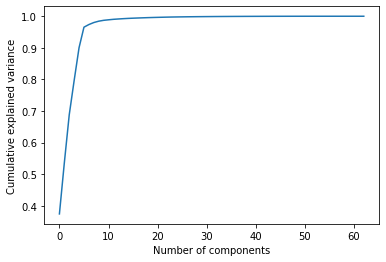

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');


In [46]:
num_components = 20
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_data)

In [47]:
X_pca.shape

(4086, 20)

In [48]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [49]:
most_important_names

['ROC7',
 '20STD',
 'google_trends_GS',
 'MACD',
 'maxlogit',
 'sentiment',
 'VIX',
 'CPALTT01USM657N',
 'MEDCPIM158SFRBCLE',
 'DJIA',
 'GSBD(march-19-2015)',
 'VIX',
 'UNRATE',
 'SI=F',
 '10YBIR',
 'HSI',
 'MUFG',
 'MUFG',
 'EURUSD=X',
 'CNYUSD=X']

In [29]:
pca.n_components_ 

20

In [34]:
len(pca.components_[1])

64

In [54]:
X_pca

array([[ 1.87753509e+00,  1.19605771e+00, -7.11645346e-01, ...,
         1.26008597e-02, -1.40190834e-02,  3.35144544e-02],
       [ 1.94972581e+00,  1.22092429e+00, -7.60645039e-01, ...,
        -4.13639708e-02,  5.76947095e-02,  3.31509566e-04],
       [ 1.74009608e+00,  6.21841204e-01,  6.01974952e-01, ...,
         1.20405098e-02, -2.33590452e-02, -1.97012536e-03],
       ...,
       [-4.86115752e-01,  2.23001881e+00, -2.03184798e+00, ...,
        -4.32319493e-02,  4.71278945e-02,  6.24255824e-03],
       [-2.12054060e-01,  6.92259046e-01,  8.23173634e-01, ...,
        -4.63273348e-02,  4.49400534e-02,  9.76716745e-04],
       [-1.17537034e-01,  9.23803961e-01,  3.73227298e-01, ...,
        -4.48795345e-02,  4.44414417e-02,  6.54057908e-03]])

In [57]:
X_pca = pd.DataFrame(X_pca)
X_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.877535,1.196058,-0.711645,-0.818452,0.534001,-0.354258,-0.141361,0.001198,-0.006657,-0.007189,0.035168,0.035455,0.008045,-0.058832,0.147835,-0.076092,-0.058178,0.012601,-0.014019,0.033514
1,1.949726,1.220924,-0.760645,-0.773241,0.517157,-0.350082,0.131304,-0.002235,-0.002823,0.017506,0.070036,-0.186976,-0.001164,-0.002167,-0.027122,-0.193378,-0.187373,-0.041364,0.057695,0.000332
2,1.740096,0.621841,0.601975,-0.711700,1.301973,-0.420072,-0.112955,0.016985,-0.006123,-0.010014,0.011227,0.036670,0.000731,0.000745,-0.010794,0.024565,0.016748,0.012041,-0.023359,-0.001970
3,1.464342,1.724842,-1.747143,-0.383630,0.015187,-0.285837,-0.064014,-0.007241,-0.001929,-0.000680,0.011293,0.036850,-0.004014,-0.000418,-0.010723,0.021812,0.009472,0.011992,-0.020152,-0.000775
4,1.253212,0.844049,0.222958,-0.417117,1.123277,-0.394388,-0.078019,0.011442,-0.003986,-0.006914,0.007675,0.029401,-0.000489,0.000457,-0.012453,0.026530,0.014483,0.010874,-0.021231,-0.000982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,-1.550350,0.812751,1.797974,-2.059276,-0.911510,-0.659793,0.229439,-0.006592,-0.015355,0.069062,-0.129066,0.266110,-0.023176,0.089309,0.248785,-0.173448,0.068693,-0.388892,0.185697,-0.261155
4082,-0.559027,0.663520,1.688259,-2.811869,0.809065,-0.443167,-0.171569,0.015195,-0.032325,0.023439,0.087910,-0.090431,0.058490,-0.016046,-0.065163,0.137512,-0.089499,-0.162568,0.054773,0.060236
4083,-0.486116,2.230019,-2.031848,-2.443762,-0.858719,-0.397664,-0.104355,-0.019893,-0.027097,-0.006218,0.007194,-0.085119,0.003944,-0.026722,-0.017484,-0.002131,0.042126,-0.043232,0.047128,0.006243
4084,-0.212054,0.692259,0.823174,-2.002023,-1.433897,-0.502351,-0.145480,-0.001512,-0.025567,-0.017701,0.004634,-0.078125,0.007122,-0.026496,-0.020952,0.004306,0.042487,-0.046327,0.044940,0.000977


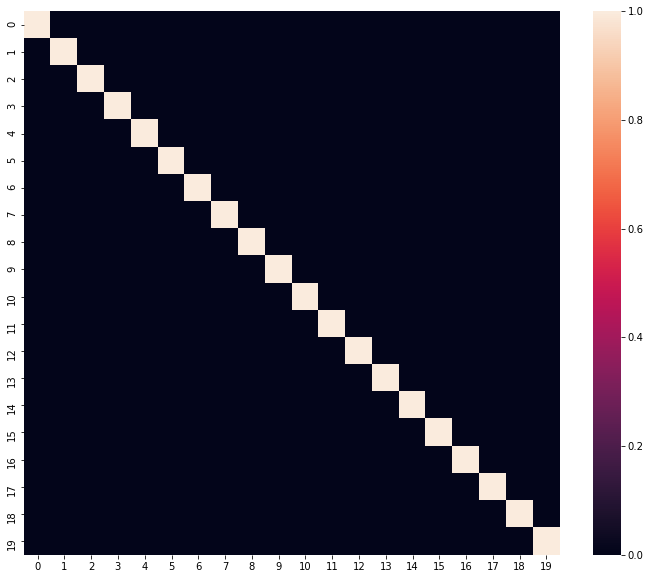

In [66]:
corr_cols = X_pca.columns.tolist()
plt.figure(figsize = (12,10))
sns.heatmap(X_pca.corr());

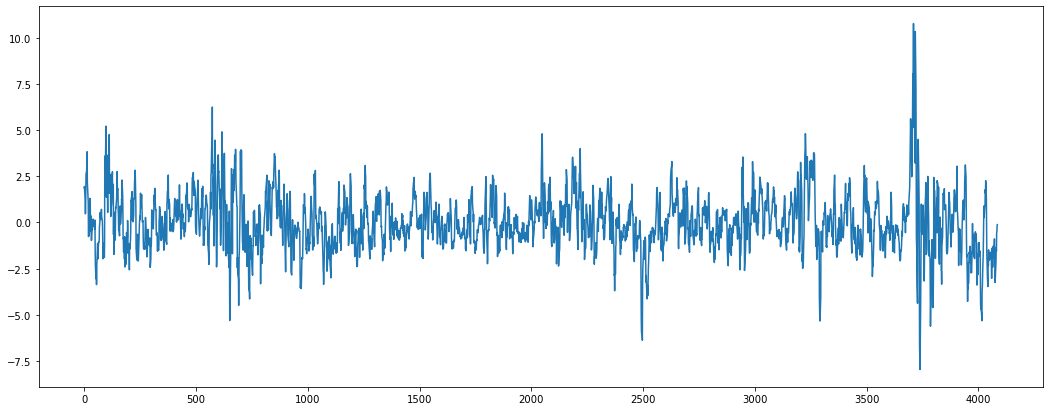

In [62]:
X_pca[0].plot(figsize=(18,7));